<a href="https://colab.research.google.com/github/stefanogiagu/corso_AML_2023/blob/main/notebooks/es3/AML_2023_HandsOn_3_SimCLR_CNN_v2_0_PART_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [3]:
cd /content/gdrive/MyDrive/AuroreBoreali

/content/gdrive/MyDrive/AuroreBoreali


In [4]:
import os

with np.load("supervised_latent.npz") as data:
  latent_space=data["latent_space"]
  y_true=data["y_true"]
  y_pred=data["y_pred"]


In [5]:
print(latent_space.shape)
print(y_true.shape)

(1165, 128)
(1165,)


In [6]:
# utulity function to plot during training the quality of the learned representation
# plots tSNE 2D distributions of learned representation
# for tSNE: see https://scikit-learn.org/stable/modules/manifold.html#t-sne

from sklearn.manifold import TSNE

def plot_features(num_classes,latent_space,y_true):
     
  tsne = TSNE(n_components = 2, perplexity = 50)
  x_feats = tsne.fit_transform(latent_space)
  num_samples = len(y_true)

  for i in range(num_classes):
      plt.scatter(x_feats[y_true==i,1],x_feats[y_true==i,0])
  
  plt.legend([str(i) for i in range(num_classes)])
  

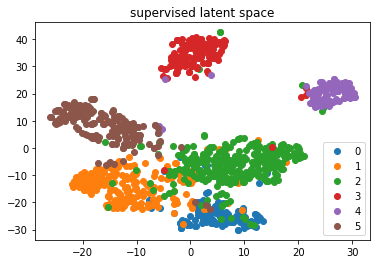

In [7]:
plot_features(6,latent_space,y_true)
plt.title("supervised latent space")
plt.show()

In [8]:
latent_space[0]

array([0.23472838, 0.        , 0.        , 0.04299057, 0.        ,
       1.608138  , 0.        , 1.0516894 , 0.        , 0.        ,
       0.5654475 , 0.        , 2.149627  , 2.0697904 , 1.6295198 ,
       0.38056996, 0.1808964 , 0.        , 0.        , 1.986246  ,
       0.72012544, 0.6284349 , 0.        , 0.        , 0.        ,
       0.        , 1.7268525 , 0.17590556, 0.        , 1.4163002 ,
       0.        , 0.        , 0.        , 0.        , 1.3694355 ,
       0.        , 0.3491178 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16515602, 2.1228802 , 0.        ,
       0.7253174 , 0.        , 0.9934665 , 0.        , 1.0622187 ,
       0.        , 1.8380518 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.4534212 , 0.        ,
       0.23584767, 0.08997039, 0.9486938 , 0.        , 0.        ,
       0.        , 0.61242217, 0.        , 0.        , 1.8345735 ,
       0.        , 0.        , 1.5956565 , 0.        , 0.     

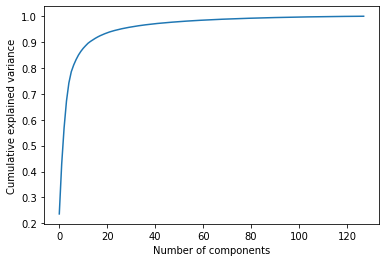

Reduced data shape: (1165, 20)


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(latent_space)

# Create an explained variance vs dimensions plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Perform dimensionality reduction to 50 components
X_reduced = PCA(n_components=20).fit_transform(latent_space)

# Print the reduced data
print("Reduced data shape:", X_reduced.shape)

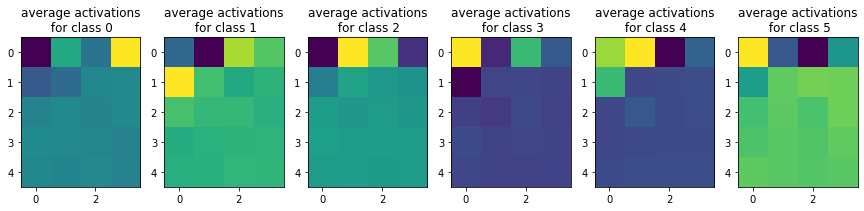

In [10]:
f,ax =plt.subplots(1,6,figsize=(15,3))
for i in np.unique(y_pred):
  ax[i].imshow(X_reduced[y_pred==i].mean(axis=0).reshape(5,4))
  ax[i].set_title("average activations\n for class {}".format(i))

In [11]:
# Dataset Load UNSUPEVISED
with np.load("unsupervised_latent.npz") as data:
  latent_space_test=data["latent_space"]
  y_true_test=data["y_true"]

with np.load("unsupervised_latent_vali.npz") as data:
  latent_space_train=data["latent_space"]
  y_true_train=data["y_true"] 

In [12]:
from sklearn.preprocessing import StandardScaler
if 0:
  scaler = StandardScaler()
  scaler.fit(latent_space_train)

  latent_space_test = scaler.transform(latent_space_test)
  latent_space_train = scaler.transform(latent_space_train)

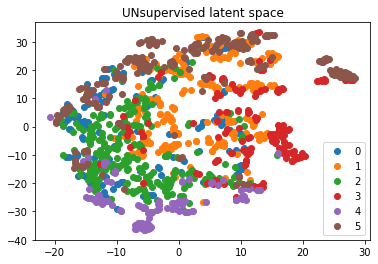

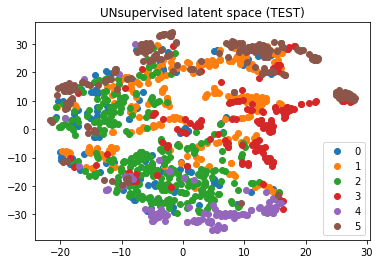

In [13]:
plot_features(6,latent_space_train,y_true_train)
plt.title("UNsupervised latent space")
plt.show()
plot_features(6,latent_space_test,y_true_test)
plt.title("UNsupervised latent space (TEST)")
plt.show()

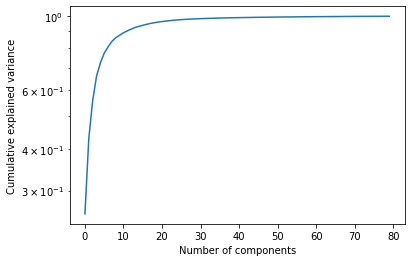

Reduced data shape: (1165, 40)


In [28]:
pca = PCA()
X_pca_train = pca.fit_transform(latent_space_train)


# Create an explained variance vs dimensions plot
f,ax=plt.subplots(1)
ax.plot(np.cumsum(pca.explained_variance_ratio_[0:80]))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
ax.set_yscale('log')
plt.show()

# Perform dimensionality reduction to 50 components
pca = PCA(n_components=40)
X_reduced_train = pca.fit_transform(latent_space_train)
X_reduced_test = pca.transform(latent_space_test)

# Print the reduced data
print("Reduced data shape:", X_reduced_train.shape)

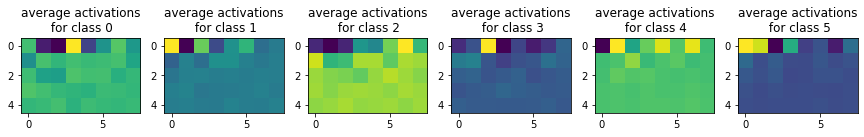

In [29]:
f,ax =plt.subplots(1,6,figsize=(15,3))
for i in np.unique(y_true_train.astype("int")):
  ax[i].imshow(X_reduced_test[y_true_test.astype("int")==i].mean(axis=0).reshape(5,8))
  ax[i].set_title("average activations\n for class {}".format(i))

In [44]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer



# Convert y to one-hot encoding
lb = LabelBinarizer()
y_train_onehot = lb.fit_transform(y_true_train)
y_test_onehot = lb.transform(y_true_test)

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

# Fit the classifier to the training data
knn.fit(X_reduced_train, y_true_train)
#knn.fit(latent_space_train, y_true_train)

# Compute predictions on test set

y_pred = knn.predict(X_reduced_test)
#y_pred = knn.predict(latent_space_test)
#y_scores = knn.predict_proba(latent_space_test)
y_scores = knn.predict_proba(X_reduced_test)


# Compute accuracy on test set
accuracy = np.sum(y_pred == y_true_test) / y_true_test.shape[0]

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7373390557939914


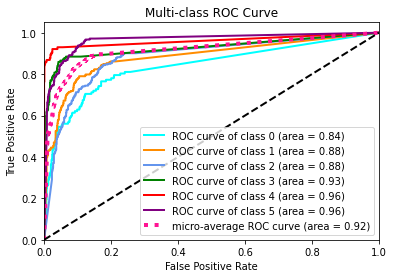

In [45]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
n_classes = 6
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve( y_test_onehot[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green',"red","purple"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()